<a href="https://colab.research.google.com/github/Olamiposi-Ini/Portfolio/blob/main/AI_enabled_waste_management_systems_Optimizing_waste_collection_routes_with_Ant_Colony_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Define known areas in Kwara State with their approximate coordinates
areas = {
    "Ilorin": (8.4966, 4.5421),
    "Offa": (8.1484, 4.7201),
    "Lafiagi": (8.8627, 5.4169),
    "Patigi": (8.7290, 5.7530),
    "Jebba": (9.1300, 4.8200),
    "Kaiama": (9.6146, 3.9418),
    "Omu-Aran": (8.1415, 5.0942),
    "Igbaja": (8.2833, 4.8833),
    "Ajase-Ipo": (8.2333, 4.8333),
    "Share": (8.8142, 4.9603)
}

# Convert areas dictionary to DataFrame
waste_points_df = pd.DataFrame(areas.items(), columns=['Area', 'Coordinates'])

# Extract coordinates
coordinates = np.array(list(areas.values()))

# Function to calculate the distance between points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Create a distance matrix
distance_matrix = np.zeros((len(coordinates), len(coordinates)))
for i in range(len(coordinates)):
    for j in range(len(coordinates)):
        if i != j:
            distance_matrix[i][j] = calculate_distance(coordinates[i], coordinates[j])

# Create a DataFrame for the distance matrix
distance_df = pd.DataFrame(distance_matrix, columns=areas.keys(), index=areas.keys())

# Save the datasets to CSV files
waste_points_df.to_csv('waste_collection_points_kwara.csv', index=False)
distance_df.to_csv('distance_matrix_kwara.csv')

print("Waste collection points:\n", waste_points_df)
print("\nDistance matrix:\n", distance_df)


Waste collection points:
         Area       Coordinates
0     Ilorin  (8.4966, 4.5421)
1       Offa  (8.1484, 4.7201)
2    Lafiagi  (8.8627, 5.4169)
3     Patigi    (8.729, 5.753)
4      Jebba      (9.13, 4.82)
5     Kaiama  (9.6146, 3.9418)
6   Omu-Aran  (8.1415, 5.0942)
7     Igbaja  (8.2833, 4.8833)
8  Ajase-Ipo  (8.2333, 4.8333)
9      Share  (8.8142, 4.9603)

Distance matrix:
                Ilorin        Offa     Lafiagi      Patigi       Jebba  \
Ilorin       0.000000   43.214359  104.442311  135.742226   76.434859   
Offa        43.214359    0.000000  110.122445  130.618549  109.119711   
Lafiagi    104.442311  110.122445    0.000000   39.824456   71.985440   
Patigi     135.742226  130.618549   39.824456    0.000000  111.785019   
Jebba       76.434859  109.119711   71.985440  111.785019    0.000000   
Kaiama     140.162641  183.371479  182.178815  221.852388  110.354472   
Omu-Aran    72.395334   41.234375   87.319258   97.392339  113.416494   
Igbaja      44.369446   23.365

In [ ]:
class AntColonyOptimization:
    def __init__(self, distance_matrix, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distance_matrix = distance_matrix
        self.pheromone = np.ones(self.distance_matrix.shape) / len(distance_matrix)
        self.all_inds = range(len(distance_matrix))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distance_matrix[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distance_matrix) - 1):
            move = self.pick_move(self.pheromone[prev], self.distance_matrix[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        # Avoid division by zero
        with np.errstate(divide='ignore', invalid='ignore'):
            row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
            row[dist == 0] = 0  # Prevent divide by zero

        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distance_matrix[move]

    def calc_distance(self, coord1, coord2):
        return geodesic(coord1, coord2).kilometers


Shortest path: [(0, 1), (1, 8), (8, 7), (7, 6), (6, 3), (3, 2), (2, 9), (9, 4), (4, 5), (5, 0)]
Path length: 571.0994418762498


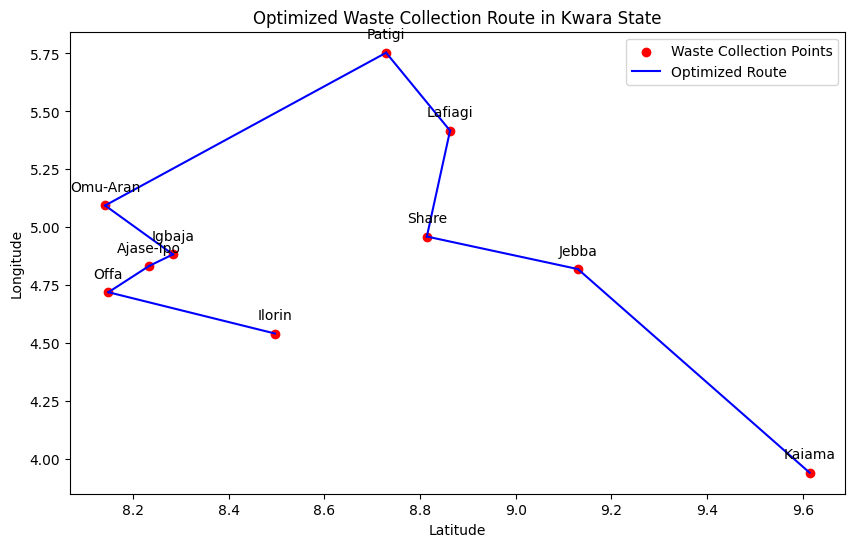

In [ ]:
# Load the dataset
waste_points_df = pd.read_csv('waste_collection_points_kwara.csv')
distance_df = pd.read_csv('distance_matrix_kwara.csv', index_col=0)

# Convert the distance DataFrame to a NumPy array
distance_matrix = distance_df.values

# Coordinates of waste collection points
coordinates = waste_points_df['Coordinates'].apply(eval).values

# ACO parameters
n_ants = 10
n_best = 5
n_iterations = 100
decay = 0.95
alpha = 1
beta = 2

# Create and run ACO
aco = AntColonyOptimization(distance_matrix, n_ants, n_best, n_iterations, decay, alpha, beta)
shortest_path, path_length = aco.run()

# Print the results
print(f'Shortest path: {shortest_path}')
print(f'Path length: {path_length}')

# Plot the coordinates
plt.figure(figsize=(10, 6))
plt.scatter([coord[0] for coord in coordinates], [coord[1] for coord in coordinates], color='red', label='Waste Collection Points')

# Add labels for each area
for i, txt in enumerate(waste_points_df['Area']):
    plt.annotate(txt, (coordinates[i][0], coordinates[i][1]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot the path
for i in range(len(shortest_path) - 1):
    start = shortest_path[i][0]
    end = shortest_path[i][1]
    plt.plot([coordinates[start][0], coordinates[end][0]], [coordinates[start][1], coordinates[end][1]], color='blue')

# Plot the closing edge
start = shortest_path[-1][1]
end = shortest_path[0][0]
plt.plot([coordinates[start][0], coordinates[end][0]], [coordinates[start][1], coordinates[end][1]], color='blue', label='Optimized Route')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Optimized Waste Collection Route in Kwara State')
plt.legend()
plt.show()
